In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/user_behavior_dataset.csv')

In [ ]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
from sklearn import preprocessing

le  = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Operating System'] = le.fit_transform(df['Operating System'])

In [ ]:
x = df[['Operating System','App Usage Time (min/day)','Number of Apps Installed','Data Usage (MB/day)','Age','Gender']]
y = df['User Behavior Class']

In [ ]:
print(x,y)

     Operating System  App Usage Time (min/day)  Number of Apps Installed  \
0                   0                       393                        67   
1                   0                       268                        42   
2                   0                       154                        32   
3                   0                       239                        56   
4                   1                       187                        58   
..                ...                       ...                       ...   
695                 1                        92                        26   
696                 0                       316                        68   
697                 0                        99                        22   
698                 0                        62                        13   
699                 0                       212                        49   

     Data Usage (MB/day)  Age  Gender  
0                   1122   40      

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state =10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
k = 5

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
accuracy =accuracy_score(y_test,y_pred)
print(accuracy)

precision = precision_score(y_test,y_pred,average='weighted')
print(precision)

f1score =f1_score(y_test,y_pred,average='weighted')
print(f1score)

1.0
1.0
1.0


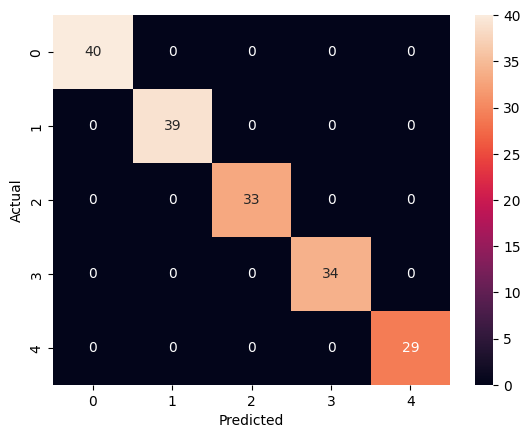

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test)
accuracy =accuracy_score(y_test,y_pred)
print(accuracy)
precision = precision_score(y_test,y_pred,average = 'weighted')
print(precision)
f1score =f1_score(y_test,y_pred,average='weighted')
print(f1score)

0.6857142857142857
0.6912949482459464
0.686967635539064
